# Titanic Passenger Survival Analysis 
## by [Dan Hillman](http://danhillman.dev)
### **BEFORE READING**
This project was originally a submission as part of Udacity's Data Scientist Nanodegree program in 2017. Originally, the code was written in Python 2.7 but has been since updated to Python 3.

## 1. Purpose of this Analysis

There are four independent variables that will be analyzed in this report:
1. **Ticket Fare**
    * Did passengers who paid for a ticket with a price *higher* than the overall mean ticket price have a better chance of surviving than passengers who paid for a ticket with a price *lower* than the overall mean ticket price?
    * Was the difference between fare values of survivng passengers and the fare values of non-survivng passengers *statistically significant*?
2. **Age**
    * Did passengers whose age was *less* than the overall mean age have a better chance of surviving than passengers whose age was *greater* than the overall mean age?
    * Were there any age groups with mean survival percentages that were much different than other age groups' survival percentages?
3. **Sex**
    * Did one sex have a better chance than surviving than the other? If so, was the result statistically significant?
4. **Port of Departure (Embarked)**
    * Which port of departure had the highest passenger survival rate?

The dependent variable in this analysis is the **survival** of each pasenger.

## 2. Data Cleaning

### Counting non-blank data
The supplied CSV file contains 891 records of passenger data. To find out which relevant columns contain blank records, each relevant column's data has been counted.

The **Fare** and **Sex** columns contain no blank records.

The **Age** column contains 177 blank records.

The **Embarked** column contains 2 blank records.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

filename = "titanic.csv"
titanic_df = pd.read_csv(filename)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
row_count = titanic_df.shape[0]

fare_count = titanic_df.loc[:,'Fare'].count()
age_count = titanic_df.loc[:,'Age'].count()
sex_count = titanic_df.loc[:,'Sex'].count()
embarked_count = titanic_df.loc[:,'Embarked'].count()
        
print('Count of # of non-blank records:')
print('')
print('Fare: {}'.format(fare_count))
print('Blanks: {}'.format(row_count - fare_count))
print('')
print('Age: {}'.format(age_count))
print('Blanks: {}'.format(row_count - age_count))
print('')
print('Sex: {}'.format(sex_count))
print('Blanks: {}'.format(row_count - sex_count))
print('')
print('Embarked: {}'.format(embarked_count))
print('Blanks: {}'.format(row_count - embarked_count))

Count of # of non-blank records:

Fare: 891
Blanks: 0

Age: 714
Blanks: 177

Sex: 891
Blanks: 0

Embarked: 889
Blanks: 2


### Removing rows containing blank data
For each relevant column containing blank data, a "dropNA" dataframe has been created that removes rows containing blank data in that specific column. To ensure that Pandas' "dropNA" method has been performed correctly, a count of the number of rows contained in each new DataFrame has been performed. The number of rows in the new DataFrame should equal the number of non-blank records counted in the previous cell. 

The DataFrames used for analyzing the **Ticket Fare** variable and **Sex** variable do not require removal of any rows because there is no blank data in either of these columns. The DataFrames used for these variables will contain 891 rows.

The DataFrame used for analyzing the **Age** variable requires removal of rows that contain blank data in the Age column. The DataFrame used for analyzing this variable will contain 714 rows.

The DataFrame used for analyzing the **Embarked** variable requires removal of rows that contain blank data in the Embarked column. The DataFrame used for analyzing this variable will contain 889 rows.

In [3]:
age_dropna_df = titanic_df.copy()
age_dropna_df.dropna(subset=['Age'], inplace=True)

embarked_dropna_df = titanic_df.copy()
embarked_dropna_df.dropna(subset=['Embarked'], inplace=True)

def print_cleaning_report(age_count, embarked_count, age_dropna_df, embarked_dropna_df):
    str_list = ['Age', 'Embarked']
    cleaned_df_list = [age_dropna_df, embarked_dropna_df]
    count_list = [age_count, embarked_count]
    print('Row count for cleaned DataFrames previosly containing blank data:')
    print('')
    for string, df, count in zip(str_list, cleaned_df_list, count_list):
        print('{}: {} rows'.format(string, df.shape[0]))
        if count == df.shape[0]:
            print('The DataFrame cleaning for the analysis of the {} variable was successful.'.format(string))
        else:
            print('ERROR: DataFrame cleaning for the analysis of the {} variable was NOT successful.'.format(string))
        print('')

print_cleaning_report(age_count, embarked_count, age_dropna_df, embarked_dropna_df)

Row count for cleaned DataFrames previosly containing blank data:

Age: 714 rows
The DataFrame cleaning for the analysis of the Age variable was successful.

Embarked: 889 rows
The DataFrame cleaning for the analysis of the Embarked variable was successful.



### Removing Unnecessary Columns
For the sake of simplicity, the separate DataFrames used for analyzing each independent variable will initially include only the "Survived" column and the independent variable's column.

#### Custom Function for Dropping Unncessary Columns
Since there are many more rows to be dropped than kept in each DataFrame, it is practical to create a function that accepts an argument for a list of rows to keep. Pandas' "drop" method only accepts an argument for a list of columns to drop, so the "drop_columns_inplace" function below accepts an argument for a list of columns to keep.

In [4]:
def drop_columns_inplace(df, columns_to_keep):
    column_list = list(df)
    columns_to_drop_list = []
    for column in column_list:
        if column not in columns_to_keep:
            columns_to_drop_list.append(column)
    df.drop(labels=columns_to_drop_list, axis=1, inplace=True)

#### Fare DataFrame

##### Checking for Major Outliers
The histogram showing frequency of passenger fare shows some outlier(s) in the ~460 to ~510 range. To ensure that these value(s) do not skew the analysis of fare data, any fares over 200 will be removed.

In [5]:
fare_cleaned_df = titanic_df.copy()

drop_columns_inplace(fare_cleaned_df, ['Fare','Survived'])

fare_cleaned_df.head()

,Survived,Fare
0,0,7.2500
1,1,71.2833
2,1,7.9250
3,1,53.1000
4,0,8.0500


,count,mean
Survived,,
0,549.0,22.117887
1,342.0,48.395408


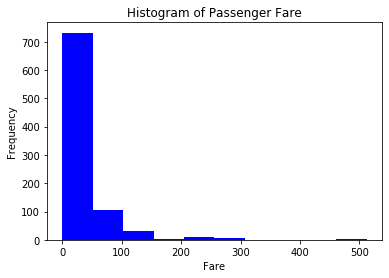

In [6]:
%matplotlib inline

plt.hist(fare_cleaned_df['Fare'].values, color='blue')
plt.title("Histogram of Passenger Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
grouped_fare_cleaned_df = fare_cleaned_df.copy()

grouped_fare_cleaned_df = grouped_fare_cleaned_df.groupby(['Survived'], as_index=True)['Fare']
grouped_fare_cleaned_df.describe().loc[:,['count','mean']]

##### Dropping Rows with Fares > 200

,count,mean
Survived,,
0,543.0,19.720801
1,328.0,37.802998


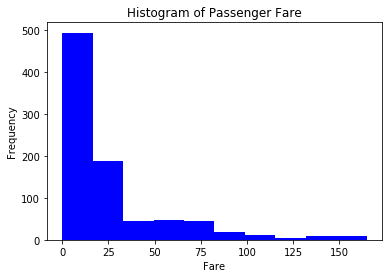

In [7]:
fare_cleaned_df = fare_cleaned_df.drop(fare_cleaned_df[fare_cleaned_df.Fare > 200].index)

%matplotlib inline

plt.hist(fare_cleaned_df['Fare'].values, color='blue')
plt.title("Histogram of Passenger Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")

grouped_fare_cleaned_df = fare_cleaned_df.copy()

grouped_fare_cleaned_df = grouped_fare_cleaned_df.groupby(['Survived'], as_index=True)['Fare']
grouped_fare_cleaned_df.describe().loc[:,['count','mean']]

#### Sex DataFrame

In [8]:
sex_cleaned_df = titanic_df.copy()

drop_columns_inplace(sex_cleaned_df, ['Survived','Sex'])

sex_cleaned_df.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

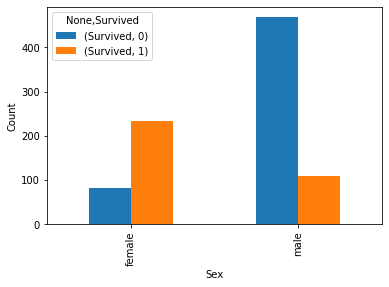

In [9]:
grouped_sex_cleaned_df = sex_cleaned_df.copy()
grouped_sex_cleaned_df = grouped_sex_cleaned_df.groupby(['Sex','Survived'], as_index=True)

grouped_sex_cleaned_df[['Survived']].count().unstack().plot(kind='bar').set_ylabel('Count')
grouped_sex_cleaned_df[['Survived']].count()

#### Age DataFrame

In [10]:
age_cleaned_df = age_dropna_df
drop_columns_inplace(age_cleaned_df, ['Age','Survived'])

print('Age DataFrame Preview:')
age_cleaned_df.head()

Age DataFrame Preview:


,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


,Survived,Age
count,714.000000,714.000000
mean,0.406162,29.699118
std,0.491460,14.526497
min,0.000000,0.420000
25%,0.000000,20.125000
50%,0.000000,28.000000
75%,1.000000,38.000000
max,1.000000,80.000000


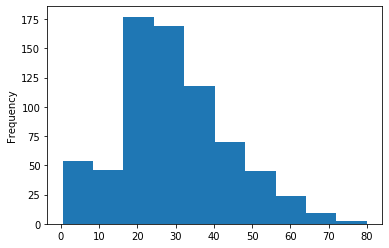

In [11]:
age_cleaned_df['Age'].plot(kind='hist')
age_cleaned_df.describe()

#### Embarked DataFrame

In [12]:
embarked_cleaned_df = embarked_dropna_df
drop_columns_inplace(embarked_cleaned_df, ['Embarked','Survived'])

print('Embarked DataFrame Preview:')
embarked_cleaned_df.head()

Embarked DataFrame Preview:


,Survived,Embarked
0,0,S
1,1,C
2,1,S
3,1,S
4,0,S


##### Port of Embarkation Data Comments
There is a much larger number of passengers who embarked from Southampton compared to passengers who embarked from either Cherbourg or Queenstown. With this disparity in mind, the results from the analysis of port of embarkation should not be given marked consideration.

Survived
Embarked Survived          
C        0               75
         1               93
Q        0               47
         1               30
S        0              427
         1              217

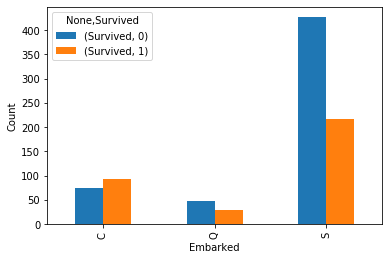

In [13]:
grouped_embarked_cleaned_df = embarked_cleaned_df.copy()
grouped_embarked_cleaned_df = grouped_embarked_cleaned_df.groupby(['Embarked','Survived'], as_index=True)

grouped_embarked_cleaned_df[['Survived']].count().unstack().plot(kind='bar').set_ylabel('Count')
grouped_embarked_cleaned_df[['Survived']].count()

## 3. Data Exploration

### List of Custom Functions Used In Two or More Sections:

In [14]:
def standardize_column(df_with_column, mean, std):
    return (df_with_column - mean) / std

def above_or_below_mean(df_with_column):
    if df_with_column > 0:
        return 'Above Mean'
    else:
        return 'Below Mean'

### Part 1: Ticket Fare

#### Mean Fare

In [15]:
mean_fare = fare_cleaned_df['Fare'].mean()
print('Mean Fare:')
print(mean_fare)

Mean Fare:
26.530170378874793


#### Standard Deviation of Fare

In [16]:
std_fare = fare_cleaned_df['Fare'].std(ddof=0)
print('Standard Deviation of Fare:')
print(std_fare)

Standard Deviation of Fare:
29.33432962153612


In [17]:
grouped_fare = fare_cleaned_df.copy()
grouped_fare = grouped_fare.groupby(['Survived'], as_index=True)

In [18]:
print('Mean Fare by Survival Group:')
grouped_fare.mean()

Mean Fare by Survival Group:


,Fare
Survived,
0,19.720801
1,37.802998


In [19]:
print('Standard Deviation of Fare by Survival Group:')
grouped_fare.std(ddof=0)

Standard Deviation of Fare by Survival Group:


,Fare
Survived,
0,21.542841
1,36.234176


#### Fare Boxplot

,mean,std
Survived,,
0,19.720801,21.562705
1,37.802998,36.289537


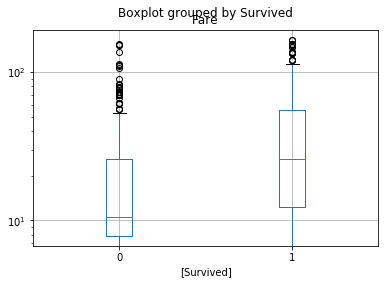

In [20]:
fare_boxplot = fare_cleaned_df.copy()
fare_boxplot.boxplot(column=['Fare'], by=['Survived']).set_yscale('log')

fare_boxplot_grouped = fare_boxplot.copy()
fare_boxplot_grouped = fare_boxplot_grouped.groupby(['Survived'], as_index=True)
fare_boxplot_grouped['Fare'].describe().loc[:,['mean','std']]

#### Standardizing Fare
To be able to group the fare data by values above the mean and below the mean, a new column named "Fare Standardized" will be created that contains the z-score for each passenger fare. NumPy's "vectorize" method will be implemented to apply the custom "standardize_column" function to the new column.

In [21]:
fare_cleaned_df_standardized = fare_cleaned_df.copy()

fare_cleaned_df_standardized['Fare Standardized'] = \
    np.vectorize(standardize_column)(fare_cleaned_df_standardized['Fare'],mean_fare,std_fare)

fare_cleaned_df_standardized.head()

,Survived,Fare,Fare Standardized
0,0,7.2500,-0.657256
1,1,71.2833,1.525623
2,1,7.9250,-0.634246
3,1,53.1000,0.905759
4,0,8.0500,-0.629984


#### "Above or Below Mean Fare" Column
A new column named "Above or Below Mean Fare" will be created using NumPy's "vectorize" method. This new column will assign a value of either "Above Mean" or "Below Mean" based on whether the value in "Fare Standardized" is greater or lesser than 0.

In [22]:
fare_cleaned_df_standardized_final = fare_cleaned_df_standardized.copy()

fare_cleaned_df_standardized_final['Above Or Below Mean Fare'] = \
    np.vectorize(above_or_below_mean)(fare_cleaned_df_standardized_final['Fare Standardized'])

fare_cleaned_df_standardized_final.head()

,Survived,Fare,Fare Standardized,Above Or Below Mean Fare
0,0,7.2500,-0.657256,Below Mean
1,1,71.2833,1.525623,Above Mean
2,1,7.9250,-0.634246,Below Mean
3,1,53.1000,0.905759,Above Mean
4,0,8.0500,-0.629984,Below Mean


In [23]:
fare_cleaned_df_standardized_final = \
    fare_cleaned_df_standardized_final.drop(['Fare Standardized'], axis=1)
fare_cleaned_df_standardized_final = \
    fare_cleaned_df_standardized_final.groupby(['Above Or Below Mean Fare','Survived'], as_index=True)

#### Mean Fare Broken Down
The most interesting observation from this grouped data is that in both cases where the passenger's fare is either above or below the mean, the passengers who survived paid a higher fare than those who did not survive. A possible explanation for this could be that cabins with higher fares were located closer to the top of the ship as opposed to cabins near the bottom that were not nearly as safe.

In [24]:
fare_cleaned_df_standardized_final.mean()

Fare
Above Or Below Mean Fare Survived           
Above Mean               0         50.159526
                         1         68.641403
Below Mean               0         10.900078
                         1         14.259701

In [25]:
fare_survival_grouped = fare_cleaned_df.copy()
fare_survival_grouped = fare_survival_grouped.groupby('Survived')

survived_fare_values = fare_survival_grouped.get_group(1)['Fare'].values
not_survived_fare_values = fare_survival_grouped.get_group(0)['Fare'].values

#### Histogram of Fare of Surviving and Non-Surviving Passengers
Presented below is a histogram of passengers' fare data who survived and of those whom did not survive. Note the large frequency of non-surviving passenger fare in the 0 to ~20 range compared to surviving passenger fare in the same range. Also worth noting is the large difference between frequencies of surviving and non-surviving passenger fares in the ~50 to ~150 range.

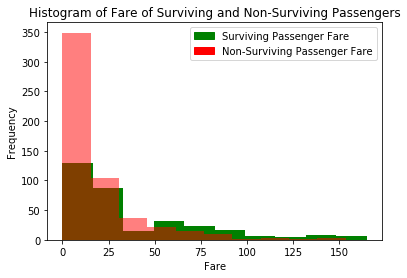

In [26]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.hist(survived_fare_values, color='green')
plt.hist(not_survived_fare_values, color='red', alpha=0.5)
plt.title("Histogram of Fare of Surviving and Non-Surviving Passengers")
plt.xlabel("Fare")
plt.ylabel("Frequency")
green_patch = mpatches.Patch(color='green', label='Surviving Passenger Fare')
red_patch = mpatches.Patch(color='red', label='Non-Surviving Passenger Fare')
plt.legend(handles=[green_patch, red_patch])

#### Statistical Significance Test: Mann-Whitney U Test for Fare Data
To test for statistical significance between the fare data of surviving passengers and fare data of non-surviving passengers, the Mann-Whitney U-Test will be used. The Mann-Whitney U-Test is the most applicable statistical test in this instance because the Mann-Whitney U-Test does not require the distributions of the samples to be normally distributed or have the same sample sizes unlike an independent t-test.

An independent t-test would not be applicable in this instance because the sample sizes of the fare data for surviving and non-surviving passengers are different and are not normally distributed as seen in the previous cell.

To conduct a Mann-Whitney U-Test, the "mannwhitneyu" method from the "stats" package of scipy will be implemented. The "mannwhitneyu" method returns a tuple containing a U-statistic and a P-Value. The P-Value is the most informative metric in this case. The "alternative" argument in the "mannwhitneyu" method with the value "greater" sets the method to conduct a one-sided test to check if the surviving passenger fare values are *significantly* greater than the non-surviving fare values.

The significance will be tested at alpha = 0.05 in a one-tailed test.

##### HYPOTHESES:

Null Hypothesis: Survived Fare Values = Non-Survived Fare Values

Alternative Hypothesis: Survived Fare Values > Non-Survived Fare Values

##### RESULTS:

According to the results of the test, the surviving passenger fare values are *statistically significantly* greater than the non-surviving fare values with a P-value of 1.179e-20 at alpha = 0.05. **The null hypothesis is rejected.**

In [27]:
from scipy import stats

mann_whitney_u_fare_results = stats.mannwhitneyu\
    (survived_fare_values, not_survived_fare_values, alternative='greater')

print('Mann-Whitney U Test Results for Fare Values of Surviving and Non-Surviving Passengers:')
print('')
print(mann_whitney_u_fare_results)

Mann-Whitney U Test Results for Fare Values of Surviving and Non-Surviving Passengers:

MannwhitneyuResult(statistic=122302.5, pvalue=1.1789432800624655e-20)


In [28]:
print('Mann-Whitney U Test P-Value for Fare Values of Surviving and Non-Surviving Passengers:')
print('')
print('p-value = {}'.format(mann_whitney_u_fare_results[1]))

Mann-Whitney U Test P-Value for Fare Values of Surviving and Non-Surviving Passengers:

p-value = 1.1789432800624655e-20


### Part 2: Age

#### Mean Age

In [29]:
mean_age = age_cleaned_df['Age'].mean()
print('Mean Age:')
print(mean_age)

Mean Age:
29.69911764705882


#### Standard Deviation of Age

In [30]:
std_age = age_cleaned_df['Age'].std(ddof=0)
print('Standard Deviation of Age:')
print(std_age)

Standard Deviation of Age:
14.516321150817317


In [31]:
grouped_age = age_cleaned_df.copy()
grouped_age = grouped_age.groupby(['Survived'], as_index=False)

In [32]:
print('Mean Age by Survival Group:')
grouped_age.mean()

Mean Age by Survival Group:


,Survived,Age
0,0,30.626179
1,1,28.343690


#### Standardizing Age

In [33]:
age_cleaned_df_standardized = age_cleaned_df.copy()

age_cleaned_df_standardized['Age Standardized'] = \
    np.vectorize(standardize_column)(age_cleaned_df_standardized['Age'],mean_age,std_age)

age_cleaned_df_standardized.head()

,Survived,Age,Age Standardized
0,0,22.0,-0.530377
1,1,38.0,0.571831
2,1,26.0,-0.254825
3,1,35.0,0.365167
4,0,35.0,0.365167


In [34]:
age_cleaned_df_standardized_final = age_cleaned_df_standardized

age_cleaned_df_standardized_final['Above Or Below Mean Age'] = \
    np.vectorize(above_or_below_mean)(age_cleaned_df_standardized_final['Age Standardized'])

age_cleaned_df_standardized_final.head()

,Survived,Age,Age Standardized,Above Or Below Mean Age
0,0,22.0,-0.530377,Below Mean
1,1,38.0,0.571831,Above Mean
2,1,26.0,-0.254825,Below Mean
3,1,35.0,0.365167,Above Mean
4,0,35.0,0.365167,Above Mean


In [35]:
age_cleaned_df_standardized_final = \
    age_cleaned_df_standardized_final.drop(['Age','Age Standardized'], axis=1)
age_cleaned_df_standardized_final = \
    age_cleaned_df_standardized_final.groupby(['Above Or Below Mean Age'], as_index=True)

#### "Above Mean and Below Mean" Analysis Results Inconclusive
Both categories for ages above and below the mean age have nearly the same chances of survival at 40.6%. To reach a more precise conclusion, the age data must be grouped by age group.

In [36]:
age_cleaned_df_standardized_final.mean()

,Survived
Above Or Below Mean Age,
Above Mean,0.406061
Below Mean,0.406250


#### Grouping by Age Group
To analyze the age data at a more granular level, a new column named "Age Group" will be created that assigns each age to its respective age group. To create this column, NumPy's "vectorize" method will be implemented to apply a custom function named "age_group" to the new column.

In [50]:
def age_group(df_with_column):
    if df_with_column < 10:
        return '0 - 10'
    elif df_with_column < 20:
        return '10 - 20'
    elif df_with_column < 30:
        return '20 - 30'
    elif df_with_column < 40:
        return '30 - 40'
    elif df_with_column < 50:
        return '40 - 50'
    elif df_with_column < 60:
        return '50 - 60'
    elif df_with_column < 70:
        return '60 - 70'
    else:
        return '70+'
    
age_cleaned_df_modified = age_cleaned_df.copy()

age_cleaned_df_modified['Age Group'] = \
    np.vectorize(age_group)(age_cleaned_df_modified['Age'])

age_cleaned_df_modified_grouped = age_cleaned_df_modified.copy()
      
age_cleaned_df_modified_grouped =\
    age_cleaned_df_modified_grouped.groupby(['Age Group','Survived'], as_index=True)
    
age_cleaned_df_count = age_cleaned_df_modified.copy()

age_cleaned_df_count['Age Group'] = \
    np.vectorize(age_group)(age_cleaned_df_count['Age'])

age_cleaned_df_count.drop(['Age'], inplace=True, axis=1)
age_cleaned_df_count_grouped = age_cleaned_df_count
age_cleaned_df_count_grouped = age_cleaned_df_count_grouped.groupby(['Age Group','Survived'], as_index=True)

age_cleaned_df_modified_grouped.count()

Age
Age Group Survived     
0 - 10    0          24
          1          38
10 - 20   0          61
          1          41
20 - 30   0         143
          1          77
30 - 40   0          94
          1          73
40 - 50   0          55
          1          34
50 - 60   0          28
          1          20
60 - 70   0          13
          1           6
70+       0           6
          1           1

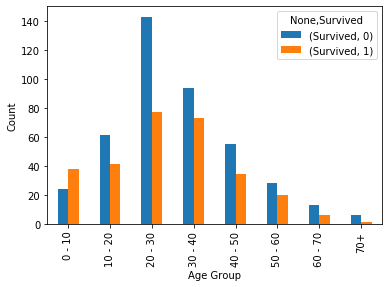

In [52]:
age_cleaned_df_count_grouped[['Survived']].count().unstack().plot(kind='bar').set_ylabel('Count')
plt.show()

#### Survival Mean Grouped by Age Group
Based on the survival mean of each age group, the age group with the highest survival rate is the "0 - 10" years old group. At a 61.2% survival rate, children in this group were likely to survive the disaster. One inference that can be made is that adults prioritized childrens' survival over their own, so they were willing risk their lives to ensure their childrens' survival. The sample size for children in this age group is still relatively small, so the data could be slightly skewed.

Also worth noting is that passengers over the age of 70 had the worst survival rate of the age groups with only 1 in 7 surviving. This statistic could possibly be skewed by the small number of passengers in this age group.

,Survived
Age Group,
0 - 10,0.612903
10 - 20,0.401961
20 - 30,0.350000
30 - 40,0.437126
40 - 50,0.382022
50 - 60,0.416667
60 - 70,0.315789
70+,0.142857


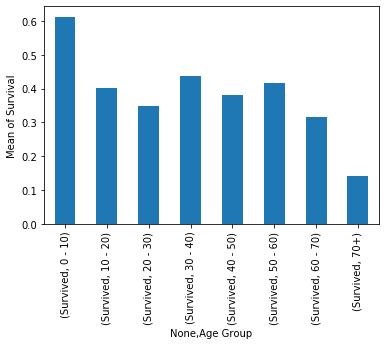

In [38]:
age_cleaned_df_mean = age_cleaned_df_modified.copy()

age_cleaned_df_mean['Age Group'] = \
    np.vectorize(age_group)(age_cleaned_df_mean['Age'])

age_cleaned_df_mean.drop(['Age'], inplace=True, axis=1)
age_cleaned_df_mean_grouped = age_cleaned_df_mean
age_cleaned_df_mean_grouped = age_cleaned_df_mean_grouped.groupby(['Age Group'], as_index=True)
    
age_cleaned_df_mean_grouped[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Mean of Survival')
age_cleaned_df_mean_grouped.mean()

In [39]:
survived_age_values = grouped_age.get_group(1)['Age']
non_survived_age_values = grouped_age.get_group(0)['Age']

#### Histogram of Ages of Surviving and Non-Surviving Passengers
The observation worth noting from this histogram is that the 0 to ~15 years old range shows that most passengers in this age group survived (in this sample). In almost all other age groups, passengers were less likely to survive.

Age
Age Group Survived     
0 - 10    0          24
          1          38
10 - 20   0          61
          1          41
20 - 30   0         143
          1          77
30 - 40   0          94
          1          73
40 - 50   0          55
          1          34
50 - 60   0          28
          1          20
60 - 70   0          13
          1           6
70+       0           6
          1           1

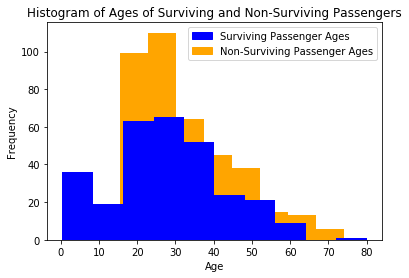

In [40]:
plt.hist(non_survived_age_values, color='orange')
plt.hist(survived_age_values, color='blue')
plt.title("Histogram of Ages of Surviving and Non-Surviving Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
blue_patch = mpatches.Patch(color='blue', label='Surviving Passenger Ages')
orange_patch = mpatches.Patch(color='orange', label='Non-Surviving Passenger Ages')
plt.legend(handles=[blue_patch, orange_patch])

age_cleaned_df_modified_grouped.count()

### Part 3: Sex

In [41]:
sex_count = sex_cleaned_df.copy()

sex_count = sex_count.groupby(['Sex'])

sex_count.count()

,Survived
Sex,
female,314
male,577


#### Mean Survival by Sex
With such a large difference in survival rate between women and men, one inference that can be made is that the men on the ship may have given priority to the womens' survival over their own. One observation worth noting is that fewer men survived than women even though men outnumbered women by 263 before the disaster (in this sample).

Although this conclusion seems highly feasible, there could still be other unconsidered factors influencing this large disparity in survival between women and men.

Mean Survival by Sex:


,Survived
Sex,
female,0.742038
male,0.188908


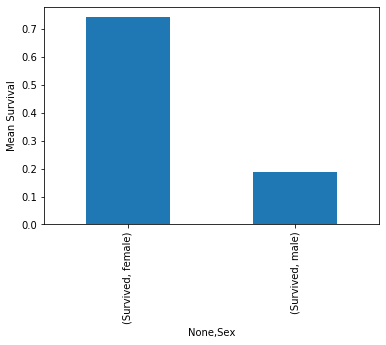

In [42]:
grouped_by_sex_df = sex_cleaned_df.copy()

grouped_by_sex_df = grouped_by_sex_df.groupby(['Sex'], as_index=True)

print('Mean Survival by Sex:')
grouped_by_sex_df.mean().unstack().plot(kind='bar').set_ylabel('Mean Survival')
grouped_by_sex_df.mean()

In [43]:
print('Number of Survived Passengers by Sex:')
grouped_by_sex_df.sum()

Number of Survived Passengers by Sex:


,Survived
Sex,
female,233
male,109


Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

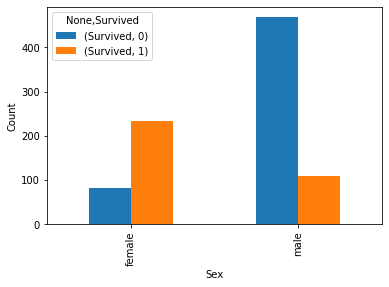

In [44]:
grouped_sex_cleaned_df = sex_cleaned_df.copy()
grouped_sex_cleaned_df = grouped_sex_cleaned_df.groupby(['Sex','Survived'], as_index=True)

grouped_sex_cleaned_df[['Survived']].count().unstack().plot(kind='bar').set_ylabel('Count')
grouped_sex_cleaned_df[['Survived']].count()

#### Statistical Significance Test for Sex: Mann-Whitney U Test

The significance will be tested at alpha = 0.05 in a one-tailed test.

##### HYPOTHESES:

Null Hypothesis: Female Survived Values = Male Survived Values

Alternative Hypothesis: Female Survived Values > Male Survived Values

##### RESULTS:

According to the results of the test, the surviving female values are *statistically significantly* greater than the surviving male values with a P-value of 2.158e-59 at alpha = 0.05. **The null hypothesis is rejected.**

In [45]:
male_survived_values = grouped_by_sex_df['Survived'].get_group('male').values
female_survived_values = grouped_by_sex_df['Survived'].get_group('female').values

In [46]:
mann_whitney_u_sex_results = stats.mannwhitneyu\
    (female_survived_values, male_survived_values, alternative='greater')

print("Mann-Whitney U Test Results for Survival Data of Both Sexes:")
print('')
print(mann_whitney_u_sex_results)

Mann-Whitney U Test Results for Survival Data of Both Sexes:

MannwhitneyuResult(statistic=140696.5, pvalue=2.157953115940508e-59)


In [47]:
print("Mann-Whitney U Test P-Value for Survival Data of Both Sexes:")
print('')
print('p-value = {}'.format(mann_whitney_u_sex_results[1]))

Mann-Whitney U Test P-Value for Survival Data of Both Sexes:

p-value = 2.157953115940508e-59


### Part 4: Port of Embarkation

#### Total Passengers from each Port of Embarkment

,Survived
Embarked,
C,168
Q,77
S,644


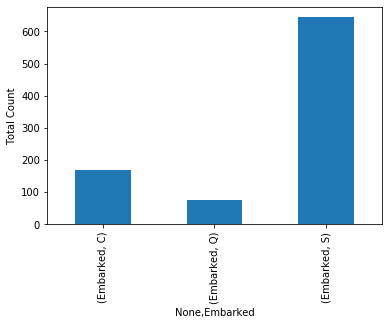

In [48]:
embarked_count = embarked_cleaned_df.copy()
embarked_count = embarked_count.groupby(['Embarked'])

embarked_count[['Embarked']].count().unstack().plot(kind='bar').set_ylabel('Total Count')
embarked_count.count()

#### Mean Survival by Port of Embarkation
The passengers who embarked at the port in Cherbourg were likely to survive, although passengers who embarked at the ports in Queenstown and Southampton were not likely to survive. 

Of all indpendent variables in this analysis, the port of embarkation would have the least effect on passenger survival unless it had some kind of influence on where those passengers' cabins would be located on the ship.

Mean Survival by Port of Embarkation:


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


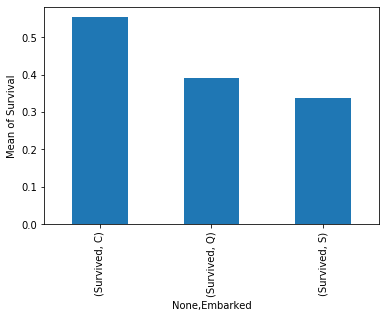

In [49]:
embarked_df_mean = embarked_cleaned_df.copy()

embarked_df_mean = embarked_df_mean.groupby(['Embarked'])

print('Mean Survival by Port of Embarkation:')
embarked_df_mean[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Mean of Survival')
embarked_df_mean.mean()

## 4. Summary and Conclusions
### Sample Size of this Dataset
Using a quick Google search, one can find that the there were **2228** total passengers aboard the Titanic. This dataset contains data about 891 of the passengers, so this dataset may **not** be completely representative of the actual passenger population. To compound this issue, some of the useful data in this dataset is missing. 

Two of the indpendent variables analyzed in this report, "Age" and "Embarked," contained rows with missing data.
These missing values could have given more enlightening insights about this dataset, especially in the "Age" analysis. Because missing values must be expunged from the analysis, the values that are left have an even stronger influence over results such as mean, standard deviation, and z-score. Some of these values that are left over could include more "extreme" data than what was missing, altering the results.

### 1. Ticket Fare Results
The "Fare" column contained no blank records, so all 891 rows from this dataset *could* have been used. Since there were some outliers on the high end that would have altered results, all rows containing ticket fare > 200 were removed. In total, 20 rows were dropped, so 871 rows remained. 

According to the results from the wrangled ticket fare data, passengers who paid higher fares than passengers who paid lower fares *generally* had a better chance of surviving. A possible explanation for this could be that cabins with higher fares were located closer to lifeboats on the ship as opposed to cabins near the bottom that took longer to reach an area with a lifeboat.

The result on ticket fare seems feasible based on intuition, but it is possible that the data from the full population of Titanic passengers may imply a more equal survival rate among passengers with different ticket fares.

### 2. Age Results
The "Age" column contained 177 blank records, so 714 rows from this dataset were used. Since there were no large outliers, no rows were dropped from the 714. 

According to the results from the wrangled age data, passengers who were within the 0-10 years old range were likely to survive. One explanation for this could be that parents prioritized their childrens' lives over their own, so they were more willing to put their children on a lifeboat then get on one themselves. The age group that had the second highest chance of surviving was the 30-40 years old range. An explanation for this could be that survival of women of child-rearing age were prioritized over other age groups that were not of child-rearing age. The group with the lowest survival rate is the 70+ range, but that result should be taken with a grain of salt because there are only 7 data points available in that range.

The result on age seems feasible based on intuition, but it is possible that the data from the full population of Titanic passengers may imply a different survival rate among passengers in different age groups.

### 3. Sex Results
The "Sex" column contained no blank records, so all 891 rows from this dataset were used. No rows were dropped from the 891.

According to the results from the sex data, female passengers had a statistically significant better chance of surviving than male passengers. A possible explanation for this could be that men prioritized women's survival over their own, so more women were able to make it to a lifeboat than men were able to.

The result on sex seems feasible based on intuition, but it is possible that the data from the full population of Titanic passengers may imply a different survival rate between males and females.

### 4. Port of Embarkation Results
The "Embarked" column contained 2 blank records, so 889 rows from this dataset were used. Since there were no large outliers, no rows were dropped from the 889.

According to the results from the port of embarkation data, passengers who embarked from Cherbourg were more likely to survive than passengers who embarked from Southampton and Queenstown. This result is less intuitive than the other previous results (ticket fare, age, sex). The port of embarkation would have the least effect on passenger survival unless it had some kind of influence on where those passengers' cabins would be located on the ship.

The result does **not** seem useful because there is such a large disparity between the number of passengers who embarked from Southampton and the number of passengers who embarked from Cherbourg and Queenstown. It is possible that the data from the full population of Titanic passengers may imply a more intuitive result, or further context may show a pattern between port of embarkation and other factors.